In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  f1_score,average_precision_score
from datetime import datetime

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
data_frame = pd.read_csv("/content/train_go05W65.csv")
data_frame.head()


,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1,Product_Holding_B2
0,CC264719,Male,41,14,0,C1,S3,['P16'],['P8']
1,CC209679,Female,47,14,1,C1,S2,"['P13', 'P20']",['P3']
2,CC319633,Female,59,14,0,C2,S2,['P11'],['P00']
3,CC231413,Female,32,16,0,C1,S2,"['P8', 'P13']",['P6']
4,CC259633,Male,30,15,0,C2,S3,"['P16', 'P17', 'P21']","['P8', 'P12']"


In [ ]:
data_frame_test = pd.read_csv("/content/test_VkM91FT.csv")
data_frame_test.head()

,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1
0,CC372708,Female,31,31,0,C2,S3,"['P12', 'P13']"
1,CC216072,Male,28,37,1,C1,S2,"['P12', 'P13']"
2,CC387629,Male,31,12,0,C2,S3,['P20']
3,CC389228,Female,55,11,0,C2,S2,"['P13', 'P21']"
4,CC394445,Male,51,49,1,C2,S1,['P13']


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37748 entries, 0 to 37747
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer_ID         37748 non-null  object
 1   Gender              37748 non-null  object
 2   Age                 37748 non-null  int64 
 3   Vintage             37748 non-null  int64 
 4   Is_Active           37748 non-null  int64 
 5   City_Category       37748 non-null  object
 6   Customer_Category   37748 non-null  object
 7   Product_Holding_B1  37748 non-null  object
 8   Product_Holding_B2  37748 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [ ]:
data_frame_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20327 entries, 0 to 20326
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer_ID         20327 non-null  object
 1   Gender              20327 non-null  object
 2   Age                 20327 non-null  int64 
 3   Vintage             20327 non-null  int64 
 4   Is_Active           20327 non-null  int64 
 5   City_Category       20327 non-null  object
 6   Customer_Category   20327 non-null  object
 7   Product_Holding_B1  20327 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.2+ MB


In [ ]:
#count the unique id in the column  the categorical label 
#is there is any duplicate customer in the data 
data_frame.Customer_ID.nunique()

37748

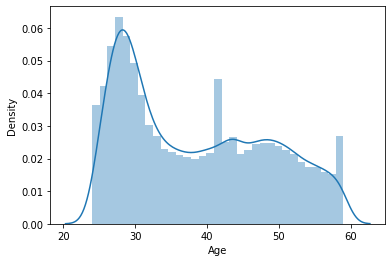

In [ ]:
#Lets see the age distributiion
sns.distplot(data_frame['Age'],hist = True)

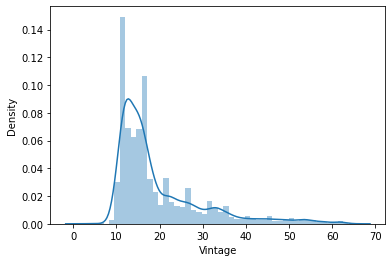

In [ ]:
sns.distplot(data_frame['Vintage'],hist = True)

In [ ]:
def unique_category(data,column):
    
    print("Total Number of Unique Category :{0}".format(data[column].nunique()))
    print("Unique Category : {0}".format(data[column].unique()))
    
    sns.countplot(x = column,data = data)
    
    

Total Number of Unique Category :2
Unique Category : [0 1]


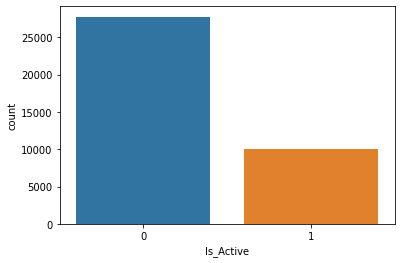

In [ ]:
col = ['Is_Active','City_Category','Customer_Category']
unique_category(data_frame,col[0])

Total Number of Unique Category :2
Unique Category : ['C1' 'C2']


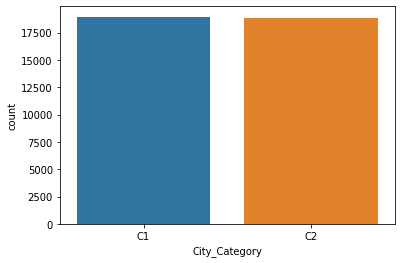

In [ ]:
col = ['Is_Active','City_Category','Customer_Category']
unique_category(data_frame,col[1])

Total Number of Unique Category :3
Unique Category : ['S3' 'S2' 'S1']


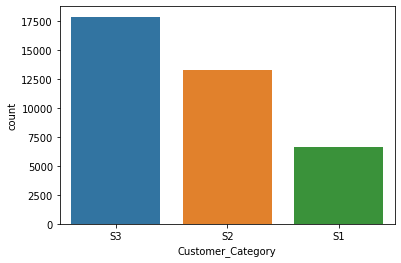

In [ ]:
col = ['Is_Active','City_Category','Customer_Category']
unique_category(data_frame,col[2])

Total Number of Unique Category :2
Unique Category : ['Male' 'Female']


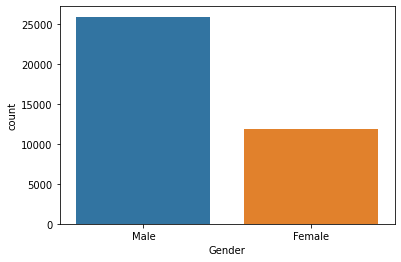

In [ ]:
col = ['Is_Active','City_Category','Customer_Category']
unique_category(data_frame,'Gender')

In [ ]:
def clean_category(data):

    data = data[1:len(data) - 1]
    data = data.split(",")
    data = "".join(data)
    data =  re.sub(r"\'","",data)        
    return data

In [ ]:
data_frame['product_holding_1_clean'] = data_frame.Product_Holding_B1.apply(lambda data : clean_category(data) )
data_frame_test['product_holding_1_clean'] = data_frame_test.Product_Holding_B1.apply(lambda data : clean_category(data) )

In [ ]:
data_frame['product_holding_2_clean'] = data_frame.Product_Holding_B2.apply(lambda data : clean_category(data) )

In [ ]:

start = datetime.now()
data_frame["product_holding_2_clean_count"] = data_frame["product_holding_2_clean"].apply(lambda text: len(text.split(" ")))
print("Time taken to run this cell :", datetime.now() - start)
data_frame.head()

Time taken to run this cell : 0:00:00.027419


,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1,Product_Holding_B2,product_holding_1_clean,product_holding_2_clean,product_holding_2_clean_count
0,CC264719,Male,41,14,0,C1,S3,['P16'],['P8'],P16,P8,1
1,CC209679,Female,47,14,1,C1,S2,"['P13', 'P20']",['P3'],P13 P20,P3,1
2,CC319633,Female,59,14,0,C2,S2,['P11'],['P00'],P11,P00,1
3,CC231413,Female,32,16,0,C1,S2,"['P8', 'P13']",['P6'],P8 P13,P6,1
4,CC259633,Male,30,15,0,C2,S3,"['P16', 'P17', 'P21']","['P8', 'P12']",P16 P17 P21,P8 P12,2


In [ ]:

start = datetime.now()
data_frame["product_holding_1_clean_count"] = data_frame["product_holding_1_clean"].apply(lambda text: len(text.split(" ")))
print("Time taken to run this cell :", datetime.now() - start)
data_frame.head()

Time taken to run this cell : 0:00:00.033497


,Customer_ID,Gender,Age,Vintage,Is_Active,City_Category,Customer_Category,Product_Holding_B1,Product_Holding_B2,product_holding_1_clean,product_holding_2_clean,product_holding_2_clean_count,product_holding_1_clean_count
0,CC264719,Male,41,14,0,C1,S3,['P16'],['P8'],P16,P8,1,1
1,CC209679,Female,47,14,1,C1,S2,"['P13', 'P20']",['P3'],P13 P20,P3,1,2
2,CC319633,Female,59,14,0,C2,S2,['P11'],['P00'],P11,P00,1,1
3,CC231413,Female,32,16,0,C1,S2,"['P8', 'P13']",['P6'],P8 P13,P6,1,2
4,CC259633,Male,30,15,0,C2,S3,"['P16', 'P17', 'P21']","['P8', 'P12']",P16 P17 P21,P8 P12,2,3


In [ ]:
data_frame.product_holding_1_clean_count.value_counts()

1    19696
2    12421
3     3986
4     1242
5      320
6       71
7        9
8        3
Name: product_holding_1_clean_count, dtype: int64

In [ ]:
# Importing & Initializing the "CountVectorizer" object, which 
#is scikit-learn's bag of words tool.

#by default 'split()' will tokenize each tag using space.
vectorizer_t = CountVectorizer(tokenizer = lambda x: x.split())
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.
tag_dtm = vectorizer_t.fit_transform(data_frame['product_holding_2_clean'])

In [ ]:
print("Total Feature Names : {0}".format(sorted(vectorizer_t.get_feature_names())))

Total Feature Names : ['p00', 'p1', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p2', 'p20', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9']


In [ ]:
# Importing & Initializing the "CountVectorizer" object, which 
#is scikit-learn's bag of words tool.

#by default 'split()' will tokenize each tag using space.
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.
product1 = vectorizer.fit_transform(data_frame['product_holding_1_clean'])
print(product1.shape)

(37748, 22)


In [ ]:
features = vectorizer_t.get_feature_names()

In [ ]:
#howmany times the label present

freq = dict(zip(features,[0]*(len(features))))
print(freq)

{'p00': 0, 'p1': 0, 'p10': 0, 'p11': 0, 'p12': 0, 'p13': 0, 'p14': 0, 'p15': 0, 'p16': 0, 'p17': 0, 'p18': 0, 'p2': 0, 'p20': 0, 'p3': 0, 'p4': 0, 'p5': 0, 'p6': 0, 'p7': 0, 'p8': 0, 'p9': 0}


In [ ]:
def number_of_times_words_present(data,freq):
    
    for row in data:
        
        for label in row.split(" "):
            
            if label.lower() in freq:
                
                freq[label.lower()] += 1
    return freq
        

In [ ]:
unique_label_occrence = number_of_times_words_present(data_frame.product_holding_2_clean.to_numpy(),freq)

In [ ]:
label_names = unique_label_occrence.keys()
label_values = list(unique_label_occrence.values())
label_values.sort()

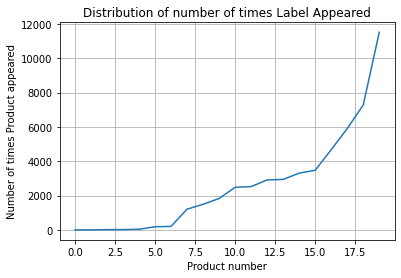

In [ ]:
plt.plot(label_values)
plt.title("Distribution of number of times Label Appeared")
plt.grid()
plt.xlabel("Product number")
plt.ylabel("Number of times Product appeared")
plt.show()

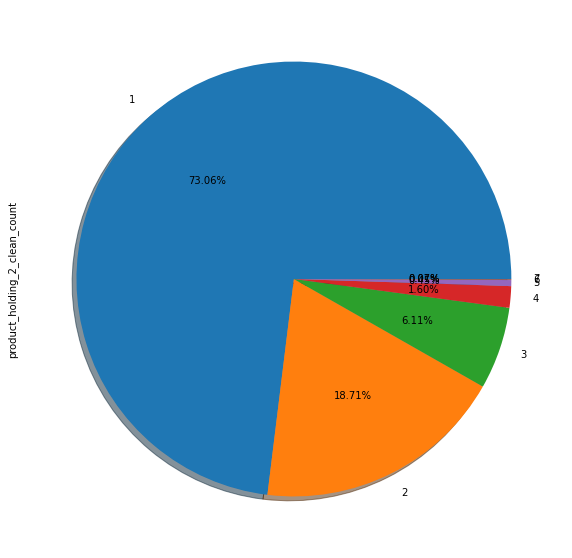

In [ ]:
#howmany  product present in each data 
plt.figure(figsize = (10,10))
data_frame.product_holding_2_clean_count.value_counts().plot.pie(autopct = "%0.2f%%" ,shadow = True )


In [ ]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(data_frame['product_holding_2_clean'])
print(multilabel_y.shape)
X = data_frame.drop(columns = ['product_holding_2_clean'],axis = 1)
y = data_frame['product_holding_2_clean']
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
vectorizer.fit(data_frame['product_holding_1_clean'])
multilabel_product_x = vectorizer.transform(data_frame['product_holding_1_clean'])
print(multilabel_product_x.shape)

(37748, 20)
(37748, 22)


In [ ]:
test_multilabel_product_x = vectorizer.transform(data_frame_test['product_holding_1_clean'])
print(test_multilabel_product_x.shape)

(20327, 22)


In [ ]:
total_size=data_frame.shape[0]
train_size=int(0.80*total_size)

x_train=data_frame.head(train_size)
x_test=data_frame.tail(total_size - train_size)

x_train_product_1 = multilabel_product_x[0:train_size,:]
x_test_product_1 = multilabel_product_x[train_size:total_size,:]
y_train = multilabel_y[0:train_size,:]
y_test = multilabel_y[train_size:total_size,:]

In [ ]:
drop_columns = ['Customer_ID', 'Product_Holding_B1', 'Product_Holding_B2',
       'product_holding_2_clean', 'product_holding_2_clean_count',
       'product_holding_1_clean', 'product_holding_1_clean_count']

In [ ]:
x_train.columns

Index(['Customer_ID', 'Gender', 'Age', 'Vintage', 'Is_Active', 'City_Category',
       'Customer_Category', 'Product_Holding_B1', 'Product_Holding_B2',
       'product_holding_1_clean', 'product_holding_2_clean',
       'product_holding_2_clean_count', 'product_holding_1_clean_count'],
      dtype='object')

In [ ]:
x_train.drop(columns = drop_columns,axis = 1,inplace = True)
x_test.drop(columns = drop_columns,axis = 1,inplace = True)


In [ ]:
data_frame_test.columns

Index(['Customer_ID', 'Gender', 'Age', 'Vintage', 'Is_Active', 'City_Category',
       'Customer_Category', 'Product_Holding_B1', 'product_holding_1_clean'],
      dtype='object')

In [ ]:
data_frame_test_copy = data_frame_test.copy()

In [ ]:
drop_test_columns = ['Customer_ID', 'Product_Holding_B1',
       'product_holding_1_clean']
data_frame_test.drop(columns = drop_test_columns,axis = 1, inplace = True)

In [ ]:
print("After Droping Shape of the Train and Test : {}".format(x_train.shape))
print("After Droping Shape of the test and Test : {}".format(x_test.shape))

After Droping Shape of the Train and Test : (30198, 6)
After Droping Shape of the test and Test : (7550, 6)


In [ ]:
x_train.columns

Index(['Gender', 'Age', 'Vintage', 'Is_Active', 'City_Category',
       'Customer_Category'],
      dtype='object')

In [ ]:
#preprocess the categorical Features 

def preprocess_category(train_data,test_data,column):
    vectorizer = CountVectorizer()
    vectorizer.fit(train_data[column])
    
    train_transform = vectorizer.transform(train_data[column])
    test_transform = vectorizer.transform(test_data[column])
    
    return (train_transform,test_transform)
x_train_gender,x_test_gender = preprocess_category(x_train,x_test,'Gender')

In [ ]:
print("Shape of the Gender : {0}".format(x_train_gender.shape))
print("Shape of the Gender : {0}".format(x_test_gender.shape))

Shape of the Gender : (30198, 2)
Shape of the Gender : (7550, 2)


In [ ]:
x_train_city_category,x_test_city_category = preprocess_category(x_train,x_test,'City_Category')
print("Shape of the City Category : {0}".format(x_train_city_category.shape))
print("Shape of the City Category : {0}".format(x_test_city_category.shape))

Shape of the City Category : (30198, 2)
Shape of the City Category : (7550, 2)


In [ ]:
x_train_customer_category,x_test_customer_category = preprocess_category(x_train,x_test,'Customer_Category')
print("Shape of the Customer Category : {0}".format(x_train_customer_category.shape))
print("Shape of the Customer Category : {0}".format(x_test_customer_category.shape))

Shape of the Customer Category : (30198, 3)
Shape of the Customer Category : (7550, 3)


In [ ]:
#normalize the numerical feature
from sklearn.preprocessing import Normalizer
def numerical_scaling(x_train,X_test,column_name):
    train_norm = Normalizer()
    train_norm.fit(x_train[column_name].values.reshape(-1,1))
    x_train_norm_transform = train_norm.fit_transform(x_train[column_name].values.reshape(-1,1))
    x_test_norm = train_norm.transform(X_test[column_name].values.reshape(-1,1))
    print("After Transforming the Data Shape")
    print("Shape of the Training Feature Category : {0}".format(x_train_norm_transform.shape))    
    print("Shape of the Validation Feature Category : {0}".format(x_test_norm.shape))
    return (x_train_norm_transform,x_test_norm)

In [ ]:
x_train_age,x_test_age  = numerical_scaling(x_train,x_test,'Age')
x_train_vintange,x_test_vintage = numerical_scaling(x_train,x_test,'Vintage')

After Transforming the Data Shape
Shape of the Training Feature Category : (30198, 1)
Shape of the Validation Feature Category : (7550, 1)
After Transforming the Data Shape
Shape of the Training Feature Category : (30198, 1)
Shape of the Validation Feature Category : (7550, 1)


In [ ]:
x_train_is_active = x_train['Is_Active'].to_numpy().reshape(-1,1)
x_test_is_active = x_test['Is_Active'].to_numpy().reshape(-1,1)
print("Shape of the data :{}".format(x_train_is_active.shape))

Shape of the data :(30198, 1)


In [ ]:

x_train_feature = hstack((x_train_gender,x_train_city_category,x_train_customer_category,x_train_age\
                            ,x_train_is_active,x_train_product_1)).tocsr()
x_test_feature = hstack((x_test_gender,x_test_city_category,x_test_customer_category,x_test_age\
                            ,x_test_is_active,x_test_product_1)).tocsr()

In [ ]:
print("Shape of the train Dataset : {0}".format(x_train_feature.shape))
print("Shape of the test Dataset : {0}".format(x_test_feature.shape))

Shape of the train Dataset : (30198, 31)
Shape of the test Dataset : (7550, 31)


In [ ]:
print("Shape of test dataset : {}".format(y_train.shape))
print('shape of y_test dataset : {}'.format(y_test.shape))

Shape of test dataset : (30198, 20)
shape of y_test dataset : (7550, 20)


In [ ]:
from sklearn.metrics import  precision_score

In [ ]:

classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_feature, y_train)
predictions = classifier.predict(x_test_feature)

print("accuracy :",accuracy_score(y_test,predictions))
print("macro Precision score :",precision_score(y_test, predictions, average = 'macro'))
print("micro Precision score :",precision_score(y_test, predictions, average = 'micro'))


accuracy : 0.2589403973509934
macro Precision score : 0.4891244941434042
micro Precision score : 0.7033869312350325


For values of alpha = 1e-05 Precision Score 0.7238250771184903
For values of alpha = 0.0001 Precision Score 0.67027588252744
For values of alpha = 0.001 Precision Score 0.7375178316690443
For values of alpha = 0.01 Precision Score 0.7313296903460837
For values of alpha = 0.1 Precision Score 0.0
For values of alpha = 1 Precision Score 0.0


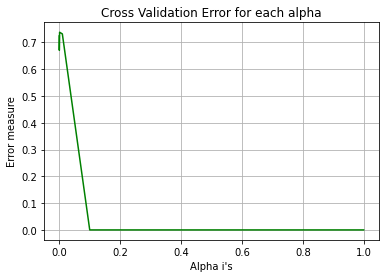

In [ ]:
#hyperparm tuning  for logistic Regression
alpha = [10 ** x for x in range(-5, 1)]



test_error = []
for i in alpha:
    classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=i, penalty='l1'), n_jobs=-1)
    classifier.fit(x_train_feature, y_train)
    predictions = classifier.predict(x_test_feature)
    micro_precision_score = precision_score(y_test, predictions, average = 'micro')
    test_error.append(micro_precision_score)
    print("For values of alpha = {} Precision Score {}".format(i,micro_precision_score))

fig, ax = plt.subplots()
ax.plot(alpha, test_error,c='g')
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


For values of alpha = 1e-05 Precision Score 0.6974367855905784
For values of alpha = 0.0001 Precision Score 0.7031865965834428
For values of alpha = 0.001 Precision Score 0.7279411764705882
For values of alpha = 0.01 Precision Score 0.7313296903460837
For values of alpha = 0.1 Precision Score 0.0
For values of alpha = 1 Precision Score 0.0


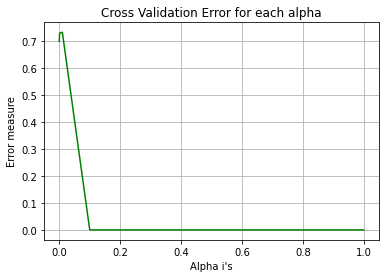

In [ ]:
#hyperparm tuning  for logistic Regression
alpha = [10 ** x for x in range(-5, 1)]

test_error = []
for i in alpha:
    classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=i, penalty='l1'), n_jobs=-1)
    classifier.fit(x_train_feature, y_train)
    predictions = classifier.predict(x_test_feature)
    micro_precision_score = precision_score(y_test, predictions, average = 'micro')
    test_error.append(micro_precision_score)
    print("For values of alpha = {} Precision Score {}".format(i,micro_precision_score))

fig, ax = plt.subplots()
ax.plot(alpha, test_error,c='g')
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


For values of alpha = 1e-05 Precision 0.6918604651162791
For values of alpha = 0.0001 Precision 0.7364850540597837
For values of alpha = 0.001 Precision 0.7236842105263158
For values of alpha = 0.01 Precision 0.7125935162094763
For values of alpha = 0.1 Precision 0.0
For values of alpha = 1 Precision 0.0


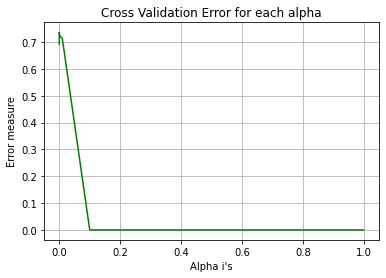

In [ ]:
#hyperparm tuning  for logistic Regression
alpha = [10 ** x for x in range(-5, 1)]


test_error = []
for i in alpha:
    classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=i, penalty='l1'), n_jobs=-1)
    classifier.fit(x_train_feature, y_train)
    predictions = classifier.predict(x_test_feature)
    micro_precision_score = precision_score(y_test, predictions, average = 'micro')
    test_error.append(micro_precision_score)
    print("For values of alpha = {} Precision {}".format(i,micro_precision_score))

fig, ax = plt.subplots()
ax.plot(alpha, test_error,c='g')
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


For values of alpha = 1e-05 Precision 0.0
For values of alpha = 0.0001 Precision 0.0
For values of alpha = 0.001 Precision 0.0
For values of alpha = 0.01 Precision 0.7513430544896393
For values of alpha = 0.1 Precision 0.7301115241635687
For values of alpha = 1 Precision 0.7212679298742696


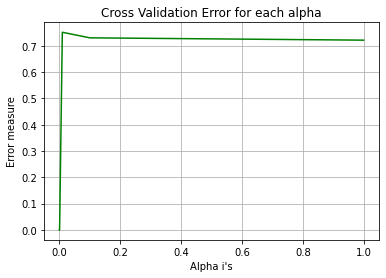

In [ ]:
#hyperparm tuning  for logistic Regression
alpha = [10 ** x for x in range(-5, 1)]



test_error = []
for i in alpha:
    classifier = OneVsRestClassifier(LogisticRegression( C =i, penalty='l1',solver = 'liblinear'), n_jobs=-1)
    classifier.fit(x_train_feature, y_train)
    predictions = classifier.predict(x_test_feature)
    micro_precision_score = precision_score(y_test, predictions, average = 'micro')
    test_error.append(micro_precision_score)
    print("For values of alpha = {} Precision {}".format(i,micro_precision_score))

fig, ax = plt.subplots()
ax.plot(alpha, test_error,c='g')
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


In [ ]:
x_train['Age'] = x_train['Age'].astype(float)
x_test['Age'] = x_test['Age'].astype(float)

x_train['Vintage'] = x_train['Vintage'].astype(float)
x_test['Vintage'] = x_test['Vintage'].astype(float)

In [ ]:
x_train_is_active = x_train['Is_Active'].to_numpy().reshape(-1,1)
x_test_is_active = x_test['Is_Active'].to_numpy().reshape(-1,1)

X_train_age = x_train['Age'].to_numpy().reshape(-1,1)
x_test_age = x_test['Age'].to_numpy().reshape(-1,1)

x_train_vintange = x_train['Vintage'].to_numpy().reshape(-1,1)
x_test_vintage = x_test['Vintage'].to_numpy().reshape(-1,1)
print("Shape of the data :{}".format(x_train_is_active.shape))
x_train_feature = hstack((x_train_gender,x_train_city_category,x_train_customer_category,x_train_age\
                            ,x_train_is_active,x_train_product_1)).tocsr()
x_test_feature = hstack((x_test_gender,x_test_city_category,x_test_customer_category,x_test_age\
                            ,x_test_is_active,x_test_product_1)).tocsr()

Shape of the data :(30198, 1)


In [ ]:
%%time 
import time
import lightgbm as lgb

CPU times: user 22.7 ms, sys: 3.24 ms, total: 25.9 ms
Wall time: 55.7 ms


Estimators =  10 Train Score 0.8122735332665176 test Score 0.8160146699266504
Estimators =  20 Train Score 0.768059351815697 test Score 0.7747302158273381
Estimators =  30 Train Score 0.756040490360649 test Score 0.7564575645756457
Time Estimate : 12.871867895126343


Text(0, 0.5, 'Score')

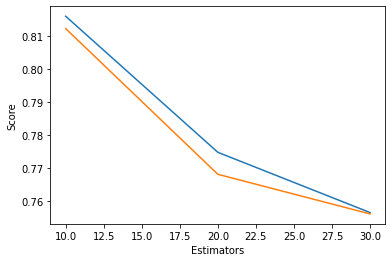

In [ ]:

train_scores = []
test_scores = []
#hyper param tuning 
start_time = time.time()
n_estimators=[10,20,30]
for estimator in n_estimators:
    
    lgbm  = OneVsRestClassifier(lgb.LGBMClassifier(learning_rate=0.1,n_estimators = estimator,max_depth= -1,random_state=314, silent=True, metric='None', n_jobs=4,
                         min_child_samples = 100,reg_alpha = 1e-1 , reg_lambda = 1e-1),n_jobs = -1)
    lgbm.fit(x_train_feature, y_train)
    train_pred = lgbm.predict(x_train_feature)
    train_precision_score = precision_score(y_train,train_pred,average= 'micro')
    test_pred =lgbm.predict(x_test_feature)
    test_precision_score = precision_score(y_test,test_pred,average= 'micro')
    test_scores.append(train_precision_score)
    train_scores.append(test_precision_score)
    
    print('Estimators = ',estimator,'Train Score',train_precision_score,'test Score',test_precision_score)
print("Time Estimate : {0}".format(time.time() - start_time))
plt.plot(n_estimators,train_scores,label='Train Score')
plt.plot(n_estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')

In [ ]:
depths=[3,9,11,15,20,35,50,70,130,1000]


train_scores = []
test_scores = []
#hyper param tuning 
best_estimator = 10
start_time = time.time()
for depth in depths:
    
    lgbm  = OneVsRestClassifier(lgb.LGBMClassifier(learning_rate=0.1,n_estimators = best_estimator,max_depth= depth,random_state=314, silent=True, metric='None', n_jobs=4,
                         min_child_samples = 100,reg_alpha = 1e-1 , reg_lambda = 1e-1),n_jobs = -1)
    lgbm.fit(x_train_feature, y_train)
    train_pred = lgbm.predict(x_train_feature)
    train_precision_score = precision_score(y_train,train_pred,average= 'micro')
    test_pred =lgbm.predict(x_test_feature)
    test_precision_score = precision_score(y_test,test_pred,average= 'micro')
    test_scores.append(train_precision_score)
    train_scores.append(test_precision_score)
    
    print('Depth = ',depth,'Train Score',train_precision_score,'test Score',test_precision_score)
print("Time Estimate : {0}".format(time.time() - start_time))
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')

In [ ]:
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]


train_scores = []
test_scores = []
#hyper param tuning 
best_estimator = 10
best_depth = 3
start_time = time.time()
for lr in learning_rate:
    
    lgbm  = OneVsRestClassifier(lgb.LGBMClassifier(learning_rate=lr,n_estimators = best_estimator,max_depth= best_depth,random_state=314, silent=True, metric='None', n_jobs=4,
                         min_child_samples = 100,reg_alpha = 1e-1 , reg_lambda = 1e-1),n_jobs = -1)
    lgbm.fit(x_train_feature, y_train)
    train_pred = lgbm.predict(x_train_feature)
    train_precision_score = precision_score(y_train,train_pred,average= 'micro')
    test_pred =lgbm.predict(x_test_feature)
    test_precision_score = precision_score(y_test,test_pred,average= 'micro')
    test_scores.append(train_precision_score)
    train_scores.append(test_precision_score)
    
    print('learning_rate = ',lr,'Train Score',train_precision_score,'test Score',test_precision_score)
print("Time Estimate : {0}".format(time.time() - start_time))
plt.plot(learning_rate,train_scores,label='Train Score')
plt.plot(learning_rate,test_scores,label='Test Score')
plt.xlabel('Learning Rate')
plt.ylabel('Score')

In [ ]:
reg_alpha =  [0, 1e-1, 1, 2, 5, 7, 10, 50, 100]



train_scores = []
test_scores = []
#hyper param tuning 
best_estimator = 10
best_depth = 3
best_lr = 0.1
start_time = time.time()
for alpha in reg_alpha:
    
    lgbm  = OneVsRestClassifier(lgb.LGBMClassifier(learning_rate=best_lr,n_estimators = best_estimator,max_depth= best_depth,random_state=314, silent=True, metric='None', n_jobs=4,
                         min_child_samples = 100,reg_alpha = alpha , reg_lambda = 1e-1),n_jobs = -1)
    lgbm.fit(x_train_feature, y_train)
    train_pred = lgbm.predict(x_train_feature)
    train_precision_score = precision_score(y_train,train_pred,average= 'micro')
    test_pred =lgbm.predict(x_test_feature)
    test_precision_score = precision_score(y_test,test_pred,average= 'micro')
    test_scores.append(train_precision_score)
    train_scores.append(test_precision_score)
    
    print('Reg_alpha = ',alpha,'Train Score',train_precision_score,'test Score',test_precision_score)
print("Time Estimate : {0}".format(time.time() - start_time))
plt.plot(reg_alpha,train_scores,label='Train Score')
plt.plot(reg_alpha,test_scores,label='Test Score')
plt.xlabel('Best Alpha')
plt.ylabel('Score')

In [ ]:


reg_lambda =  [0, 1e-1, 1, 2, 5, 7, 10, 50, 100]

train_scores = []
test_scores = []
#hyper param tuning 
best_estimator = 10
best_depth = 3
best_lr = 0.1
best_alpha = 50 
start_time = time.time()
for lamb in reg_lambda:
    
    lgbm  = OneVsRestClassifier(lgb.LGBMClassifier(learning_rate=best_lr,n_estimators = best_estimator,max_depth= best_depth,random_state=314, silent=True, metric='None', n_jobs=4,
                         min_child_samples = 100,reg_alpha = best_alpha , reg_lambda = lamb),n_jobs = -1)
    lgbm.fit(x_train_feature, y_train)
    train_pred = lgbm.predict(x_train_feature)
    train_precision_score = precision_score(y_train,train_pred,average= 'micro')
    test_pred =lgbm.predict(x_test_feature)
    test_precision_score = precision_score(y_test,test_pred,average= 'micro')
    test_scores.append(train_precision_score)
    train_scores.append(test_precision_score)
    
    print('Reg_alpha = ',lamb,'Train Score',train_precision_score,'test Score',test_precision_score)
print("Time Estimate : {0}".format(time.time() - start_time))
plt.plot(reg_lambda,train_scores,label='Train Score')
plt.plot(reg_lambda,test_scores,label='Test Score')
plt.xlabel('Best Lambda')
plt.ylabel('Score')

# Final Model Submission

In [ ]:
x_train_gender,x_test_gender = preprocess_category(data_frame,data_frame_test,'Gender')
print("Shape of the Gender : {0}".format(x_train_gender.shape))
print("Shape of the Gender : {0}".format(x_test_gender.shape))

x_train_city_category,x_test_city_category = preprocess_category(data_frame,data_frame_test,'City_Category')
print("Shape of the City Category : {0}".format(x_train_city_category.shape))
print("Shape of the City Category : {0}".format(x_test_city_category.shape))

x_train_customer_category,x_test_customer_category = preprocess_category(data_frame,data_frame_test,'Customer_Category')
print("Shape of the Customer Category : {0}".format(x_train_customer_category.shape))
print("Shape of the Customer Category : {0}".format(x_test_customer_category.shape))

x_train_is_active = data_frame['Is_Active'].to_numpy().reshape(-1,1)
x_test_is_active = data_frame_test['Is_Active'].to_numpy().reshape(-1,1)

X_train_age = data_frame['Age'].to_numpy().reshape(-1,1)
x_test_age = data_frame_test['Age'].to_numpy().reshape(-1,1)

x_train_vintange = data_frame['Vintage'].to_numpy().reshape(-1,1)
x_test_vintage = data_frame_test['Vintage'].to_numpy().reshape(-1,1)
print("Shape of the data :{}".format(x_train_is_active.shape))
x_train_feature = hstack((x_train_gender,x_train_city_category,x_train_customer_category,X_train_age\
                            ,x_train_is_active,multilabel_product_x)).tocsr()
x_test_feature = hstack((x_test_gender,x_test_city_category,x_test_customer_category,x_test_age\
                            ,x_test_is_active,test_multilabel_product_x)).tocsr()

Shape of the Gender : (37748, 2)
Shape of the Gender : (20327, 2)
Shape of the City Category : (37748, 2)
Shape of the City Category : (20327, 2)
Shape of the Customer Category : (37748, 3)
Shape of the Customer Category : (20327, 3)
Shape of the data :(37748, 1)


In [ ]:
x_train_feature = x_train_feature[:30000]
y_train = y_train[:30000]

In [ ]:
y_train = multilabel_y
print("Shape of the data : {}".format(y_train.shape))

Shape of the data : (37748, 20)


In [ ]:
def model_final():

  best_estimator = 10
  best_depth = 3
  best_lr = 0.1
  best_alpha = 50 
  lgbm  = OneVsRestClassifier(lgb.LGBMClassifier(learning_rate=best_lr,n_estimators = best_estimator,max_depth= best_depth,random_state=314, silent=True, metric='None', 
                         min_child_samples = 100,reg_alpha = best_alpha , reg_lambda = 50))
  lgbm.fit(x_train_feature, y_train)
  train_pred = lgbm.predict(x_train_feature)
  train_precision_score = precision_score(y_train,train_pred,average= 'micro')
  test_pred =lgbm.predict(x_test_feature)



In [ ]:
model_final()